## CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING

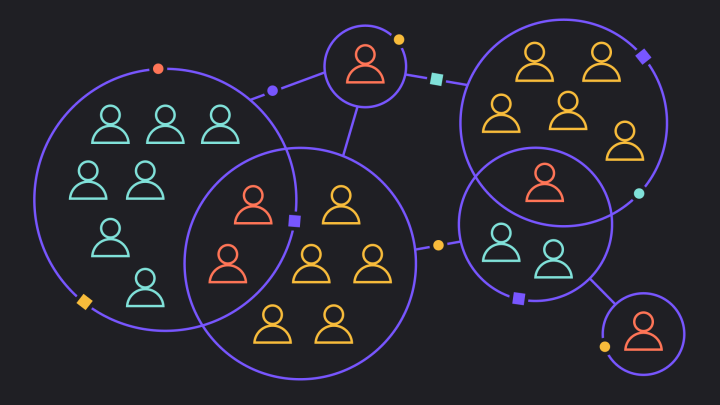

### PROBLEM STATEMENT
As the owner of the mall, you aim to identify target customer segments that can be easily converted into high-value customers. Understanding these segments will allow the marketing team to devise strategies tailored to each group, optimizing marketing efforts and enhancing customer engagement.
### Solution Approach Using K-Means Clustering
You will use K-Means clustering to segment customers based on their annual income and spending score. The goal is to identify distinct clusters of customers that share similar spending behaviors and income levels. By analyzing these clusters, you can determine which groups have the highest potential for conversion and develop targeted marketing strategies accordingly.

BY: HAKEEM WIKIREH

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

#### LOADING DATA AND EXPLORATORY ANALYSIS

In [3]:
data = pd.read_csv('/Users/hakeemwikireh/Desktop/DATASETS/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.shape

(200, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.duplicated().any()

False

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [11]:
data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [12]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Choosing Annual income and Spending score columns for Segmentation

In [13]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [14]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Choosing the number of clusters
#### WSCC = Within clusters sum of squares

In [15]:
# finding wcss for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

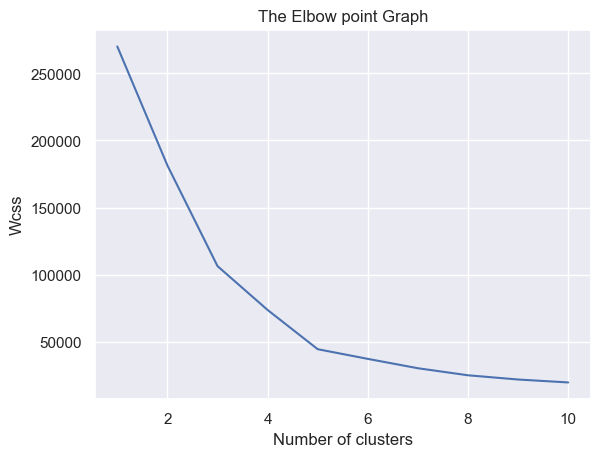

In [16]:
# Plot an elbow graph

sns.set_theme()
plt.plot(range(1,11), wcss)
plt.title('The Elbow point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

#### Optimum number of clusters = 5

## Training the K-means clustering Model since we know the optimum number 

In [17]:
kmeans = KMeans(n_clusters=5, init= 'k-means++', random_state=2)

#return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


#### Five cluster = 0,1,2,3,4

## Visualizing all the clusters and their Centroids

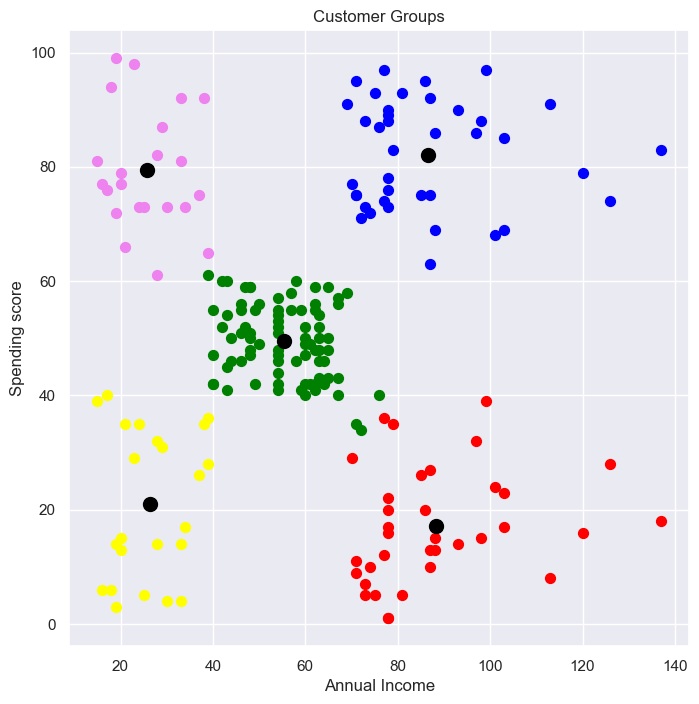

In [18]:
# plotting all the cluster and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s= 50, c='green', label = 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s= 50, c='red', label = 'Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s= 50, c='yellow', label = 'Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s= 50, c='blue', label = 'Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s= 50, c='violet', label = 'Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c= 'black', label = 'Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()

RED CLUSTER: These customers have a high potential for spending but are currently not doing so. They might require targeted marketing to increase their spending.

BLUE CLUSTER: These are the ideal customers with high income and high spending. Marketing efforts should focus on retaining these customers.

GREEN CLUSTER: These customers are average in both income and spending. They represent the middle ground and might respond to offers that improve their 
spending without high expenditure.

YELLOW CLUSTER: These customers have limited spending power. Marketing strategies should be low-cost and high-value to increase their spending.

PURPLE CLUSTER: These customers spend significantly despite having a low income. They might be targeted with value deals and budget-friendly options to maximize their spending.